<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/303_DNN_CIFAR_10_Dropout_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

> ## Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 3개 Hidden Layers & 2816개 Nodes
 - Dropout

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
# CIFAR.add(layers.Dropout(0.6))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dropout(0.5))
CIFAR.add(layers.Dense(128, activation = 'relu'))
# CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7409546 (28.27 MB)
Trainable params: 7409546 (28.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [ ]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 9s 8ms/step - loss: 2.1829 - accuracy: 0.1860 - val_loss: 1.9524 - val_accuracy: 0.2916
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 1.9222 - accuracy: 0.2934 - val_loss: 1.7972 - val_accuracy: 0.3521
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 1.7983 - accuracy: 0.3512 - val_loss: 1.7483 - val_accuracy: 0.3600
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7110 - accuracy: 0.3851 - val_loss: 1.6730 - val_accuracy: 0.3951
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 1.6461 - accuracy: 0.4105 - val_loss: 1.6264 - val_accuracy: 0.4164
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 1.6077 - accuracy: 0.4210 - val_loss: 1.5985 - val_accuracy: 0.4290
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 1.5775 - accuracy: 0.4331 - val_loss: 1.5891 - val_accuracy: 0.4393

> ## 4) 학습 결과 시각화

* Loss Visualization

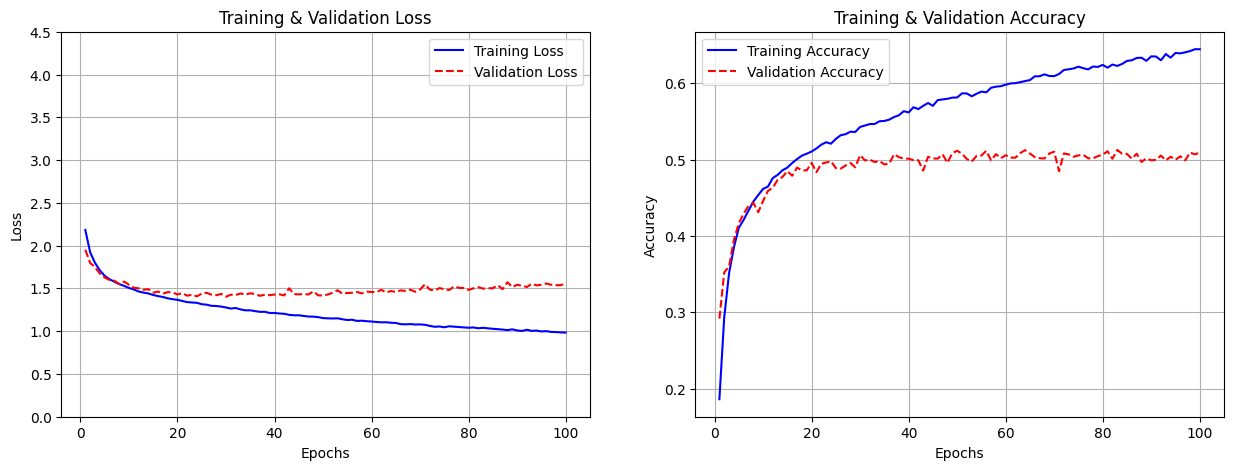

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 4.5)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 1.53647
Accuracy = 0.50650


#
#
#
# End Of Document
#
#
#